In [2]:
dict = {
    "name":["Bella", "Charlie", "Lucy", "Cooper", "Max", "Stella", "Bernie"],
    "breed":["Labrador", "Poodle", "Chow Chow", "Schnauzer", "Labrador", "Chihuahua", "St. Bernard"],
    "color":["Brown", "Black", "Brown", "Gray", "Black", "Tan", "White"],
    "height_cm":[56, 43, 46, 49, 59, 18, 77],
    "weight_kg":[24, 24, 24, 17, 29, 2, 74],
    "date_of_birth":["2013-07-01", "2016-09-16", "2014-08-25", "2011-12-11", "2017-01-20", "2015-04-20", "2018-02-27"]
}

import pandas as pd
dogs = pd.DataFrame(dict)
print(dogs.head(3)) # Prints first three rows 
dogs.info() # provides the info of dogs dataframe
dogs.shape
dogs.describe()
dogs.values
dogs.columns    # columns
dogs.index  # the row

      name      breed  color  height_cm  weight_kg date_of_birth
0    Bella   Labrador  Brown         56         24    2013-07-01
1  Charlie     Poodle  Black         43         24    2016-09-16
2     Lucy  Chow Chow  Brown         46         24    2014-08-25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7 non-null      object
 1   breed          7 non-null      object
 2   color          7 non-null      object
 3   height_cm      7 non-null      int64 
 4   weight_kg      7 non-null      int64 
 5   date_of_birth  7 non-null      object
dtypes: int64(2), object(4)
memory usage: 468.0+ bytes


RangeIndex(start=0, stop=7, step=1)

In [18]:
#Sorting
dogs.sort_values("weight_kg", ascending=False)  # Sorted in descending order
dogs.sort_values(["weight_kg", "height_cm"])    # sorted first by weight_kg and then by height_cm
dogs.sort_values(["weight_kg", "height_cm"], ascending=[True, False])
dogs["name"]    # to look at particular column
dogs[["breed", "height_cm"]]    # to look at multiple column
dogs[dogs["height_cm"] > 50]
dogs[dogs["breed"] == "Labrador"]
dogs[dogs["date_of_birth"] < "2015-01-01"]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,24,2013-07-01
2,Lucy,Chow Chow,Brown,46,24,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11


In [27]:
# Logical Operator
# is_lab = dogs["breed"] == "Labrador"
# is_brown = dogs["color"] == "Brown"
# dogs[is_lab & is_brown]
dogs[(dogs["breed"] == "Labrador") & (dogs["color"] == "Brown")]

# filter mutliple values on categorical variable
is_black_or_brown = dogs["color"].isin(["Black", "Brown"])
dogs[is_black_or_brown]
# dogs[(dogs["color"] == "Black") | (dogs["color"] == "Brown")]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,24,2013-07-01
1,Charlie,Poodle,Black,43,24,2016-09-16
2,Lucy,Chow Chow,Brown,46,24,2014-08-25
4,Max,Labrador,Black,59,29,2017-01-20


In [21]:
#new column
dogs["height_m"] = dogs["height_cm"] / 100
dogs["bmi"] = dogs["weight_kg"] / dogs["height_m"] ** 2
print(dogs.head())
bmi_lt_100 = dogs[dogs["bmi"] < 100]
bmi_lt_100_height = bmi_lt_100.sort_values("height_cm", ascending = False)
print(bmi_lt_100_height[["name", "height_cm", "bmi"]])

      name      breed  color  height_cm  weight_kg date_of_birth  height_m   
0    Bella   Labrador  Brown         56         24    2013-07-01      0.56  \
1  Charlie     Poodle  Black         43         24    2016-09-16      0.43   
2     Lucy  Chow Chow  Brown         46         24    2014-08-25      0.46   
3   Cooper  Schnauzer   Gray         49         17    2011-12-11      0.49   
4      Max   Labrador  Black         59         29    2017-01-20      0.59   

          bmi  
0   76.530612  
1  129.799892  
2  113.421550  
3   70.803832  
4   83.309394  
     name  height_cm        bmi
4     Max         59  83.309394
0   Bella         56  76.530612
3  Cooper         49  70.803832
5  Stella         18  61.728395


In [15]:
#summarizing data
print(dogs["height_cm"].mean())
print(dogs["date_of_birth"].min())  # oldest dog
print(dogs["date_of_birth"].max())  # youngest dog

# .agg() method
def pct30(column):
    return column.quantile(0.3)

print(dogs['weight_kg'].agg(pct30))
print(dogs[["weight_kg", "height_cm"]].agg(pct30))

def pct40(column):
    return column.quantile(0.4)

print(dogs["weight_kg"].agg([pct30, pct40]))
print(dogs["weight_kg"].cumsum())   # Cummulative statistics
print(dogs["weight_kg"].cummax())   # cummin(), cumprod()


49.714285714285715
2011-12-11
2018-02-27
22.599999999999998
weight_kg    22.6
height_cm    45.4
dtype: float64
pct30    22.6
pct40    24.0
Name: weight_kg, dtype: float64
0     24
1     48
2     72
3     89
4    118
5    120
6    194
Name: weight_kg, dtype: int64
0    24
1    24
2    24
3    24
4    29
5    29
6    74
Name: weight_kg, dtype: int64


In [9]:
# Counting
dogs.drop_duplicates(subset="name")
unique_dogs = dogs.drop_duplicates(subset=["name", "breed"])
print(unique_dogs)
print(unique_dogs["breed"].value_counts(sort=True)) # counts the unique
print(unique_dogs["breed"].value_counts(normalize=True))    # to count the proportion



      name        breed  color  height_cm  weight_kg date_of_birth
0    Bella     Labrador  Brown         56         24    2013-07-01
1  Charlie       Poodle  Black         43         24    2016-09-16
2     Lucy    Chow Chow  Brown         46         24    2014-08-25
3   Cooper    Schnauzer   Gray         49         17    2011-12-11
4      Max     Labrador  Black         59         29    2017-01-20
5   Stella    Chihuahua    Tan         18          2    2015-04-20
6   Bernie  St. Bernard  White         77         74    2018-02-27
breed
Labrador       2
Poodle         1
Chow Chow      1
Schnauzer      1
Chihuahua      1
St. Bernard    1
Name: count, dtype: int64
breed
Labrador       0.285714
Poodle         0.142857
Chow Chow      0.142857
Schnauzer      0.142857
Chihuahua      0.142857
St. Bernard    0.142857
Name: proportion, dtype: float64


In [16]:
# Summaries by group
print(dogs[dogs["color"] == "Black"]["weight_kg"].mean())
print(dogs[dogs["color"] == "Brown"]["weight_kg"].mean())
print(dogs[dogs["color"] == "White"]["weight_kg"].mean())
print(dogs[dogs["color"] == "Gray"]["weight_kg"].mean())
print(dogs[dogs["color"] == "Tan"]["weight_kg"].mean())

print(dogs.groupby("color")["weight_kg"].mean())
print(dogs.groupby("color")["weight_kg"].agg([min, max, sum]))
print(dogs.groupby(["color", "breed"])["weight_kg"].mean())

26.5
24.0
74.0
17.0
2.0
color
Black    26.5
Brown    24.0
Gray     17.0
Tan       2.0
White    74.0
Name: weight_kg, dtype: float64
       min  max  sum
color               
Black   24   29   53
Brown   24   24   48
Gray    17   17   17
Tan      2    2    2
White   74   74   74
color  breed      
Black  Labrador       29.0
       Poodle         24.0
Brown  Chow Chow      24.0
       Labrador       24.0
Gray   Schnauzer      17.0
Tan    Chihuahua       2.0
White  St. Bernard    74.0
Name: weight_kg, dtype: float64


In [23]:
# pivot tables
print(dogs.pivot_table(values="weight_kg", index="color"))  # values - column that we want to sumarize and index is the column we want to group by
import numpy as np
print(dogs.pivot_table(values="weight_kg", index="color", aggfunc=[np.mean, np.median]))

print(dogs.pivot_table(values="weight_kg", index="color", columns="breed", fill_value=0, margins=True)) # for multiple group by columns is used, margins = true gives the mean of the row


       weight_kg
color           
Black       26.5
Brown       24.0
Gray        17.0
Tan          2.0
White       74.0
           mean    median
      weight_kg weight_kg
color                    
Black      26.5      26.5
Brown      24.0      24.0
Gray       17.0      17.0
Tan         2.0       2.0
White      74.0      74.0
breed  Chihuahua  Chow Chow  Labrador  Poodle  Schnauzer  St. Bernard   
color                                                                   
Black          0          0      29.0      24          0            0  \
Brown          0         24      24.0       0          0            0   
Gray           0          0       0.0       0         17            0   
Tan            2          0       0.0       0          0            0   
White          0          0       0.0       0          0           74   
All            2         24      26.5      24         17           74   

breed        All  
color             
Black  26.500000  
Brown  24.000000  
Gray   17.00

In [17]:
# .columns and .index
dogs.columns
dogs.index
dogs_ind = dogs.set_index("name")
dogs_ind
dogs_ind.reset_index(drop = True)  # to reset the change, drop is used to remove the particular argument
dogs[dogs["name"].isin(["Bella", "Stella"])]
dogs_ind.loc[["Bella", "Stella"]]    # when names are the index
dogs_ind3 = dogs.set_index(["breed", "color"])  # multilevel indexes
dogs_ind3
dogs_ind3.loc[["Labrador", "Chihuahua"]]
dogs_ind3.loc[[("Labrador", "Brown"), ("Chihuahua", "Tan")]]
dogs_ind3.sort_index()
dogs_ind3.sort_index(level=["color", "breed"], ascending=[True, False])

name  height_cm  weight_kg date_of_birth
breed       color                                             
Poodle      Black  Charlie         43         24    2016-09-16
Labrador    Black      Max         59         29    2017-01-20
            Brown    Bella         56         24    2013-07-01
Chow Chow   Brown     Lucy         46         24    2014-08-25
Schnauzer   Gray    Cooper         49         17    2011-12-11
Chihuahua   Tan     Stella         18          2    2015-04-20
St. Bernard White   Bernie         77         74    2018-02-27

In [6]:
# Slicing and subsetting with .loc and .iloc
breeds=["Labradar", "Poodle", "Chow Chow", "Schnauzer", "Labradar", "Chihuahua", "St. Bernard"]
print(breeds)
breeds[2:5]
breeds[:3]
dogs_srt = dogs.set_index(["breed", "color"]).sort_index()
print(dogs_srt)
dogs_srt.loc["Chow Chow":"Poodle"]  # here final value is included
dogs_srt.loc["Tan":"Grey"]
dogs_srt.loc[("Labrador", "Brown"):("Schnauzer", "Grey")]
dogs_srt.loc[:, "name":"height_cm"]
dogs_srt.loc[("Labrador", "Brown"):("Schnauzer", "Grey"), "name":"height_cm"]
dogs.iloc[2:5, 1:4]

['Labradar', 'Poodle', 'Chow Chow', 'Schnauzer', 'Labradar', 'Chihuahua', 'St. Bernard']
                      name  height_cm  weight_kg date_of_birth
breed       color                                             
Chihuahua   Tan     Stella         18          2    2015-04-20
Chow Chow   Brown     Lucy         46         24    2014-08-25
Labrador    Black      Max         59         29    2017-01-20
            Brown    Bella         56         24    2013-07-01
Poodle      Black  Charlie         43         24    2016-09-16
Schnauzer   Gray    Cooper         49         17    2011-12-11
St. Bernard White   Bernie         77         74    2018-02-27


,breed,color,height_cm
2,Chow Chow,Brown,46
3,Schnauzer,Gray,49
4,Labrador,Black,59


In [31]:
# Working with pivot tables
# First argument - values to aggregate, index argument - columns to group by and display in rows, columns argument - columns to group by and display in columns
dogs_height_by_breed_color = dogs.pivot_table("height_cm", index="breed", columns="color")  
print(dogs_height_by_breed_color)
dogs_height_by_breed_color.loc["Chow Chow":"Poodle"]
dogs_height_by_breed_color.mean(axis="index")   # calculate statistics across rows
dogs_height_by_breed_color.mean(axis="columns") # across the columns


color        Black  Brown  Gray   Tan  White
breed                                       
Chihuahua      NaN    NaN   NaN  18.0    NaN
Chow Chow      NaN   46.0   NaN   NaN    NaN
Labrador      59.0   56.0   NaN   NaN    NaN
Poodle        43.0    NaN   NaN   NaN    NaN
Schnauzer      NaN    NaN  49.0   NaN    NaN
St. Bernard    NaN    NaN   NaN   NaN   77.0


breed
Chihuahua      18.0
Chow Chow      46.0
Labrador       57.5
Poodle         43.0
Schnauzer      49.0
St. Bernard    77.0
dtype: float64

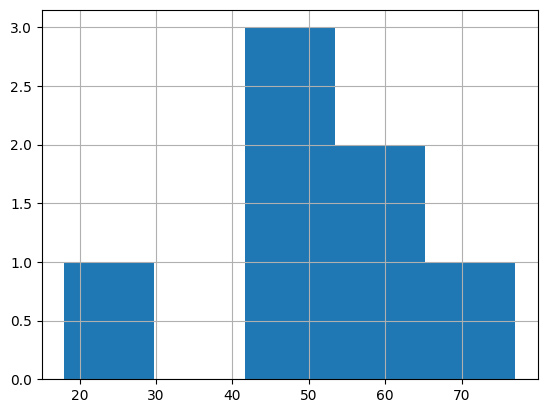

breed
Chihuahua       2.0
Chow Chow      24.0
Labrador       26.5
Poodle         24.0
Schnauzer      17.0
St. Bernard    74.0
Name: weight_kg, dtype: float64


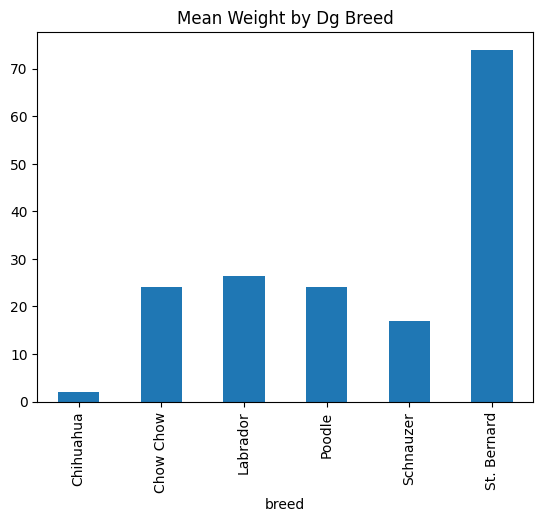

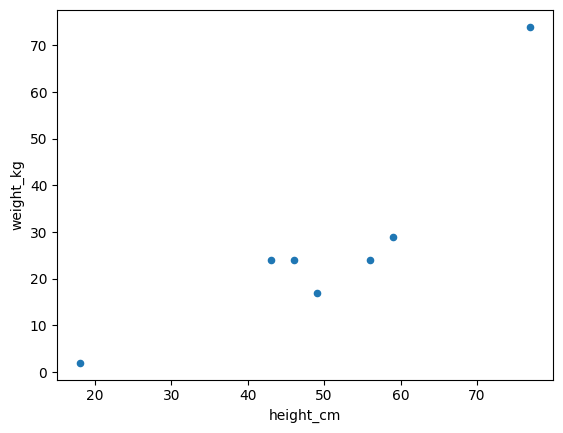

In [9]:
# Visualizing the data
import matplotlib.pyplot as plt
dogs["height_cm"].hist(bins=5)
plt.show()
avg_weight_by_breed = dogs.groupby("breed")["weight_kg"].mean()
print(avg_weight_by_breed)
avg_weight_by_breed.plot(kind="bar", title="Mean Weight by Dg Breed")
plt.show()
# sully.plot(x="date", y="weight_kg", kind="line", rot=45)  , rotates by 45°
# plt.show()
dogs.plot(x="height_cm", y="weight_kg", kind="scatter")
plt.show()
# dog_pack[dog_pack["sex"]=="F"]["height_cm"].hist(alpha=0.7)   , alpha- makes graph translucent
# dog_pack[dog_pack["sex"]=="M"]["height_cm"].hist(alpha=0.7)
# plt.legend(["F", "M"])
# plt.show()

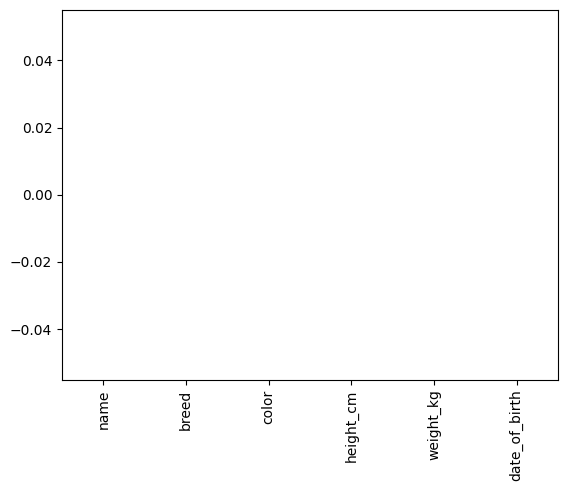

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,24,2013-07-01
1,Charlie,Poodle,Black,43,24,2016-09-16
2,Lucy,Chow Chow,Brown,46,24,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20
5,Stella,Chihuahua,Tan,18,2,2015-04-20
6,Bernie,St. Bernard,White,77,74,2018-02-27


In [20]:
# missing values
dogs.isna() # checks for missing values
dogs.isna().any()
dogs.isna().sum()   # to count nas in each column

import matplotlib.pyplot as plt
dogs.isna().sum().plot(kind="bar")
plt.show()
dogs.dropna()
dogs.fillna(0)

In [23]:
# creating dataframes
my_dict={
    "title":"Charlotte's Web",
    "author":"E.B. White",
    "published":1952
}
my_dict["title"]

# creating a list of dictionaries
list_of_dicts=[
    {"name":"Ginger", "breed":"Dachshund", "height_cm":22, "weight_kg":10, "date_of_birth":"2019-03-14"},
    {"name":"Scout", "breed":"Dalmatian", "height_cm":59, "weight_kg":25, "date_of_birth":"2019-05-09"}
]
new_dogs=pd.DataFrame(list_of_dicts)
print(new_dogs)

# creating dictionary of list
dict_of_lists={
    "name":["Ginger", "Scout"],
    "breed":["Dachshund", "Dalmation"],
    "height":[22, 59],
    "weight":[10, 25],
    "date_of_birth":["2019-03-14", "2019-05-09"]
}
new_dogs_1 = pd.DataFrame(dict_of_lists)
print(new_dogs_1)

     name      breed  height_cm  weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-14
1   Scout  Dalmatian         59         25    2019-05-09
     name      breed  height  weight date_of_birth
0  Ginger  Dachshund      22      10    2019-03-14
1   Scout  Dalmation      59      25    2019-05-09


In [ ]:
# Reading and Writing CSV files
import pandas as pd
new_dogs = pd.read_csv("new_dogs.csv")
print(new_dogs)
new_dogs["bmi"] = new_dogs["weight_kg"] / (new_dogs["height_cm"] / 100) ** 2
print(new_dogs)
new_dogs.to_csv("new_dogs_with_bmi.csv")